In [1]:
import matplotlib.pyplot as plt
import numpy as np
import time
import seaborn as sns
import pandas as pd

In [2]:
arms = np.random.normal(0, 1, 10)
optimal = np.argmax(arms)
arms

array([ 0.21285111,  1.03243317,  1.4987958 ,  0.50710049,  0.35106692,
        1.30228547, -0.22638359,  0.36907383, -0.30605714,  0.97673525])

In [34]:
df = {}
for i in range(10):
    df[str(i)] = np.random.normal(arms[i], 1, 1000)

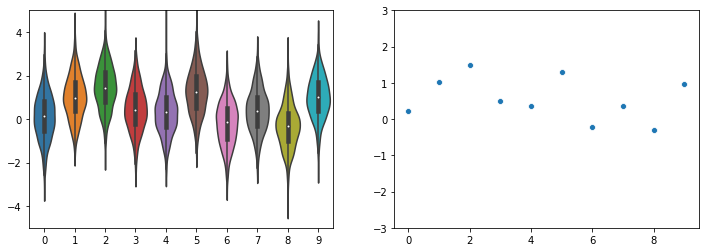

In [49]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
sns.violinplot(data=pd.DataFrame(df))
plt.ylim(-5, 5)

plt.subplot(1, 2, 2)
sns.scatterplot(data=arms)
plt.ylim(-3, 3)

plt.show()

In [50]:
def get_reward(action):
    return np.random.normal(arms[action], 1)

def update_Q(Q, reward, n):
    return Q + (reward - Q) / n

In [51]:
def run(e, n_steps=1000, n_iters=2000):
    
    stime = time.time()
    rewards = np.zeros(n_steps)
    memory = np.zeros(n_steps)
    iters = 0
    
    print("run e=%f"%e)

    while iters < n_iters:

        if iters % 100 == 0: print("%d/%d iters"%(iters, n_iters))

        steps = 0
        Qs = np.zeros(10)
        ns = np.zeros(10)

        while steps < n_steps:
            if np.random.rand() > e: A = np.argmax(Qs) #np.random.choice(np.argwhere(Qs == np.amax(Qs)).flatten(), 1)
            else: A = np.random.randint(10)

            reward = get_reward(A)
            ns[A] += 1
            Qs[A] = update_Q(Qs[A], reward, ns[A])

            rewards[steps] += reward
            if A == optimal:
                memory[steps] += 1
            steps += 1

        iters += 1
        
    print("done in %fs \n"%(time.time()-stime))
    
    return rewards/n_iters, memory/n_iters


In [52]:
es = [0, 0.1, 0.01]
result = {}
for e in es:
    result[e] = run(e, n_iters=2000)

run e=0.000000
0/2000 iters
100/2000 iters
200/2000 iters
300/2000 iters
400/2000 iters
500/2000 iters
600/2000 iters
700/2000 iters
800/2000 iters
900/2000 iters
1000/2000 iters
1100/2000 iters
1200/2000 iters
1300/2000 iters
1400/2000 iters
1500/2000 iters
1600/2000 iters
1700/2000 iters
1800/2000 iters
1900/2000 iters
done in 181.125613s 

run e=0.100000
0/2000 iters
100/2000 iters
200/2000 iters
300/2000 iters
400/2000 iters
500/2000 iters
600/2000 iters
700/2000 iters
800/2000 iters
900/2000 iters
1000/2000 iters
1100/2000 iters
1200/2000 iters
1300/2000 iters
1400/2000 iters
1500/2000 iters
1600/2000 iters
1700/2000 iters
1800/2000 iters
1900/2000 iters
done in 314.434999s 

run e=0.010000
0/2000 iters
100/2000 iters
200/2000 iters
300/2000 iters
400/2000 iters
500/2000 iters
600/2000 iters
700/2000 iters
800/2000 iters
900/2000 iters
1000/2000 iters
1100/2000 iters
1200/2000 iters
1300/2000 iters
1400/2000 iters
1500/2000 iters
1600/2000 iters
1700/2000 iters
1800/2000 iters
190

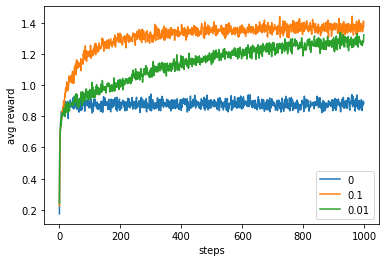

In [53]:
plt.plot(range(1000), result[0][0])
plt.plot(range(1000), result[0.1][0])
plt.plot(range(1000), result[0.01][0])

plt.legend(['0', '0.1', '0.01'])
plt.xlabel("steps")
plt.ylabel("avg reward")

plt.show()

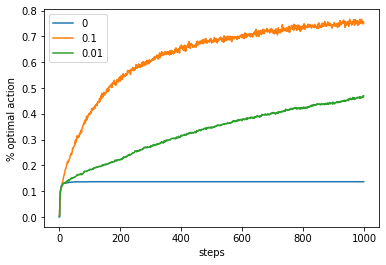

In [54]:
plt.plot(range(1000), result[0][1])
plt.plot(range(1000), result[0.1][1])
plt.plot(range(1000), result[0.01][1])

plt.legend(['0', '0.1', '0.01'])
plt.xlabel("steps")
plt.ylabel("% optimal action")

plt.show()